In [15]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dohakarroumi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["ans", "dem", "terr", "etc", "midi", "jard", "ena", "peu", "mer" "cap" "mod", "pers", "rie", "ceux", 
"comptant", "partir", "terr", "ecr", "ceux", "tour", "culs", "près", "avis", "int",
"tel", "samedi", "paul", "déjà", "avant", "bel", "leurs", "chez", "semaine", "bat", "toujours",
"plus", "être", "grand", "celui", "bien", "soir", "aussi", "dit", "mén",
"également", "coup", "cours", "faire", "pierre", "matin", "après", "près", "très", "car", "peut",
"rem", "trav", "aussi", "sept", "dame", "mod", "depuis", "mal", "plusieurs", "ainsi", "cette", "sem", "celle", "prés", "autre",
"tout", "comme", "fait", "sans", "sous", "deux", "dont", "cet", "donc", "tous", "cas", "app"]
sw = set(sw)


In [17]:
# Choisir une année
year = 1967

In [18]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(1967) in f]
txts

['KB_JB838_1967-11-11_01-00006.txt',
 'KB_JB838_1967-04-18_01-00007.txt',
 'KB_JB838_1967-04-29_01-00005.txt',
 'KB_JB838_1967-05-04_01-00025.txt',
 'KB_JB838_1967-07-15_01-00024.txt',
 'KB_JB838_1967-11-12_01-00033.txt',
 'KB_JB838_1967-11-11_01-00007.txt',
 'KB_JB838_1967-02-25_01-00005.txt',
 'KB_JB838_1967-05-11_01-00032.txt',
 'KB_JB838_1967-11-03_01-00011.txt',
 'KB_JB838_1967-03-09_01-00008.txt',
 'KB_JB838_1967-07-04_01-00006.txt',
 'KB_JB838_1967-08-22_01-00018.txt',
 'KB_JB838_1967-07-20_01-00015.txt',
 'KB_JB838_1967-03-09_01-00018.txt',
 'KB_JB838_1967-09-09_01-00002.txt',
 'KB_JB838_1967-08-17_01-00012.txt',
 'KB_JB838_1967-11-17_01-00013.txt',
 'KB_JB838_1967-10-19_01-00018.txt',
 'KB_JB838_1967-05-14_01-00013.txt',
 'KB_JB838_1967-08-20_01-00028.txt',
 'KB_JB838_1967-08-27_01-00001.txt',
 'KB_JB838_1967-08-02_01-00005.txt',
 'KB_JB838_1967-04-23_01-00015.txt',
 'KB_JB838_1967-04-22_01-00013.txt',
 'KB_JB838_1967-10-05_01-00013.txt',
 'KB_JB838_1967-12-13_01-00006.txt',
 

In [19]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [20]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [21]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"LE SOIR SAMEDI II NOVEMBRE 1967 NÉCROLOGIE On non* pris d'annoncer le décès de - MONSIEUR Guillaume EUSSEN 1 survenu, à Bruxelles, le 7 novembre 1067. dans sa 80* année.' Les funérailles ont ' eu' lie"

In [22]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{1967}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [23]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"LE SOIR SAMEDI II NOVEMBRE 1967 NÉCROLOGIE On non* pris d'annoncer le décès de - MONSIEUR Guillaume EUSSEN 1 survenu, à Bruxelles, le 7 novembre 1067. dans sa 80* année.' Les funérailles ont ' eu' lieu dans- l’Intimité V ’ ' ' ' 246752 .Cet avis tient lieu de faire-part; Brux. 12 ; 224, r. de Lombardzyde. Madame Edgard DETRYVH ALLARD vous,: faits part du décès' de son époux, MONSIEUR Edgard DETRY survenu à ; Forest, le 4 novembre 1067, dans' sa 79®« année. ■ Les funérailles • et l’Inhumation dan"

In [24]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [25]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1967_clean.txt!'

In [26]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'novembre nécrologie non pris annoncer décès monsieur guillaume eussen survenu bruxelles novembre année funérailles lieu intimité tient lieu part brux lombardzyde madame edgard detryvh allard faits part décès époux monsieur edgard detry survenu forest novembre année funérailles inhumation caveau famille cimetière ophain bols seigneur isaac lieu stricte intimité présent tient lieu part bruxelles rue max waller prie annoncer décès madame veuve leon van der cruycen née elvlre van walle veuve premièr'

In [27]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('tél', 1430), ('bruxelles', 1194), ('rue', 1050), ('rossel', 775), ('van', 581), ('brux', 528), ('prix', 513), ('heures', 486), ('part', 477), ('contre', 403)]


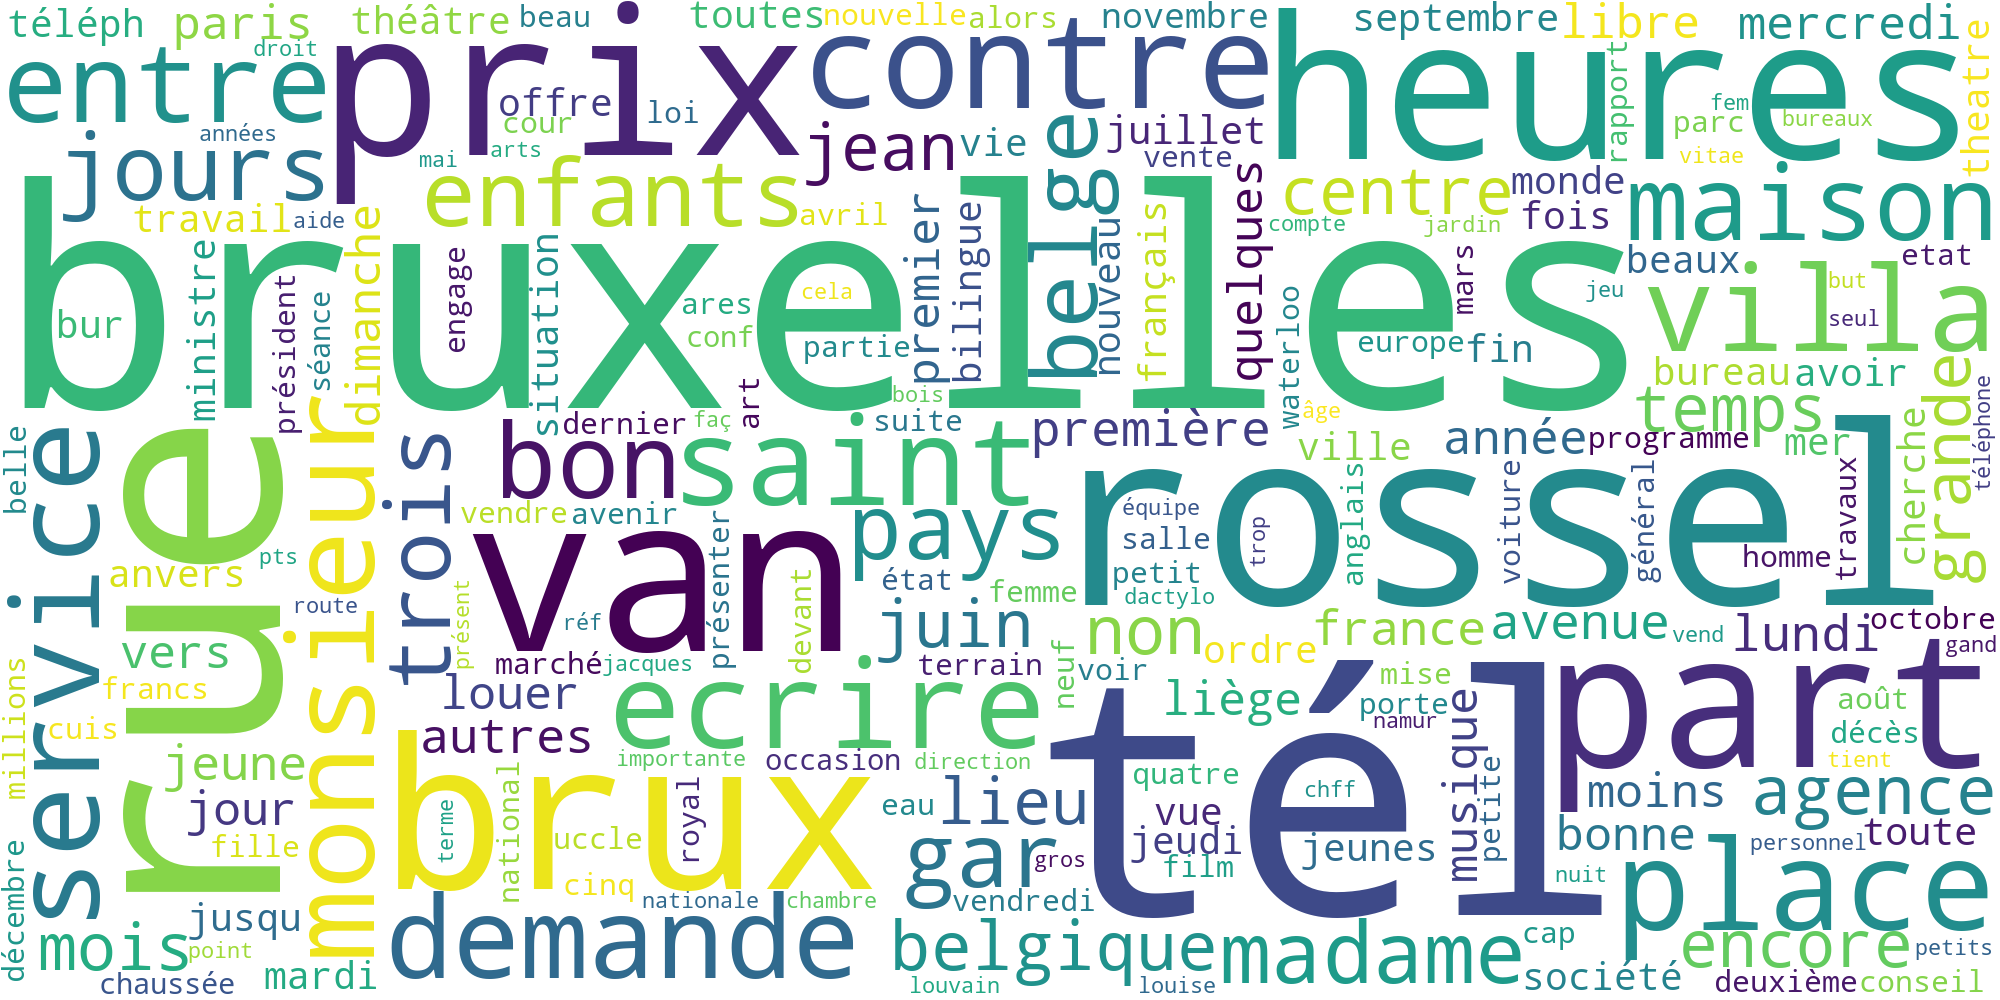

In [28]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{1967}.png"))
Image(filename=os.path.join(temp_path, f"{1967}.png"))